<a href="https://colab.research.google.com/github/madisonhgallagher/project_gss/blob/main/GSS_integrated_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 3001 Project #1

names: Madison Gallagher, Isabella Wright, Megan INSERT LAST NAME

Date: 2/10/2024

Summary:
	The General Social Survey, since 1972, has asked American’s various questions about themselves and their personal beliefs. The survey, along with an extensive list of more detailed questions, asks about participants' age, level of education, religion, and if they are opposed or in favor of capital punishment for murder. From this data, we wanted to find if religion, age, or education correlate with people’s opinions on capital punishment. To answer this question, the data from the General Social Survey first needed to be “cleaned,” meaning that any missing values or nonsensical answers needed to be recategorized or disposed of. Data was also tidied by binning age groups as well as re-categorizing religions into broader groups to allow for a more clear analysis. Initial exploration was done by cross tabbing different variables to determine any clear correlations and creating count plots to see clear distributions within variables. Kernel density estimate (KDE) plots were made for further analysis of correlation between age, education, and religion in respect to capital punishment opinions. KDE plots are useful when visualizing the estimated distribution of observations within a variable. It is extremely useful for answering our questions since it can group each variable, such as education, age, and religion by those who favor or oppose the death penalty. This allows for a “switch” in majority opinion to be observed from the probability of one opinion crossing the other. From initial cross tabbing, it was seen all religions had a majority favoring opinion towards the death penalty. It was also seen that Christians, non-religious people, and Jewish people have the highest percentage of favoring opinion towards capital punishment. The KDE plot comparing opinion of capital punishment to age revealed that people between 20 and 40 have the strongest presence towards capital punishment, and that preference decreased with age. A KDE plot of opinion over level of education also revealed that highly educated people tend to not favor the death penalty. KDE plots of age and education split up by different religions showed that eastern religions like hinduism has higher opposition rates at older ages and higher levels of education compared to religions which fall under the general umbrella of

# Data
All data used was collected from the General Social Survey. The variables in question were religion, age, education, and opinion on capital punishment, which were coded as the variables RELIG, AGE, EDUC, and CAPPUN, respectfully. The survey question regarding religion was phrased as “What is your religious preference? Is it Protestant, Catholic, Jewish, some other religion, or no religion?” with the possible answer choices of protestant, catholic, jewish, none, other, buddhism, hinduism, other easter religions, muslim/islam, orthodox christian, christian, native american, interdenominational, don't know, no answer, or skipped. All values for don’t know, no answer, and skipped were inputted as n/a, with a total of 437 n/a values. Despite the given answer choices in the code book, some answers to the religion question included “relig,” which does not make logical sense. Given the vast diversity of possible answer choices for christians, to draw clear conclusions the answers of catholic, protestant, inter-non denominational, christian, and orthodox-christian were grouped into a new “Christian” answer choice. The “relig” answers were grouped into “Other”, and given that the percentage of n/a values to total responses was less than 1%, they were dropped.
Age data was given from a range of 19 to 89, with 647 n/a values which were dropped since they were less than 1% of the survey population. Ages were grouped into 18-30, 31-40, 41-50, 51-60, 61-70, 71-80, and 81-90 to make analysis more clear. Education data was given as a number from 0 to 20, with 0 meaning no formal schooling and 20 meaning 8 years of college education or more. There were 178 n/a values, which were dropped for the same reason.
 Education data was coerced to numeric data (integers) to allow for quantitative analysis. The question regarding opinion on capital punishment was phrased as “Do you favor or oppose the death penalty for persons convicted of murder” with answer choices of favor, oppose, don’t know, no answer, or skipped, with the three latter coded as n/a, allowing the response to be a binary variable. There were 204 n/a responses, which were dropped since they represented less than 1% of the survey population.
After data wrangling, age, opinion on capital punishment, and religion were represented as categorical values while education was numerical. The decision to group age into categorical variables arose from difficulties with creating plots with age as numerical data. The age distribution of individuals was concentrated around a few specific ages, making it extremely difficult to determine where trends on capital punishment opinion lay. Grouping the data resolved this issue by allowing for a more uniform distribution across the age ranges and making KDE plots more clear.
Another issue arose when grouping religions. The vast majority of participants identified as some type of Christian, and there were 5 values that all correspond to the overarching Christian faith. When these values were not grouped, correlations were difficult to determine due to the large amount of variables present and the wide distribution within christian denominations. Grouping the christian values solved this issue, but created another issue of over-dominance in the count plots. The count of christians out-numbered other religions by a large extent to the point where graphs comparing all religions were not as useful since the scale was too large to analyze the other religions. This was solved by separating religions into their own KDE plots which use probability densities and do not take into account the scale used for all religions.


##Does religion, age, or education correlate with people's opinions on capital punishment?##

Importing thre data and necessary libraries

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns

In [46]:
df = pd.read_csv('selected_gss_data.csv',low_memory=False)

Our selected variables to answer our question are relig, cappun, age, and educ which according to the GSS codebook have the following meanings.
-RELIG: What is your religious preference?
-CAPPUN:  Do you favor or oppose the death penalty for persons convicted of murder?
-AGE: RESPONDENT'S AGE
-EDUC: RESPONDENT'S EDUCATION

In [47]:
print(df.shape)
print(df.dtypes)
df.head()

(72392, 4)
relig     object
cappun    object
age       object
educ      object
dtype: object


,relig,cappun,age,educ
0,jewish,NaN,23.0,16.0
1,catholic,NaN,70.0,10.0
2,protestant,NaN,48.0,12.0
3,other,NaN,27.0,17.0
4,protestant,NaN,61.0,12.0


##Handling errors and missing data

In [48]:
cappun = df['cappun']
cappun.unique()

array([nan, 'favor', 'oppose', 'cappun'], dtype=object)

In [49]:
relig = df['relig']
relig.unique()

array(['jewish', 'catholic', 'protestant', 'other', 'none', nan, 'relig',
       'inter-nondenominational', 'christian', 'muslim/islam', 'buddhism',
       'orthodox-christian', 'native american', 'hinduism',
       'other eastern religions'], dtype=object)

In [50]:
age = df['age']
age.unique()

array(['23.0', '70.0', '48.0', '27.0', '61.0', '26.0', '28.0', '21.0',
       '30.0', '56.0', '54.0', '49.0', '41.0', '24.0', '62.0', '46.0',
       '57.0', '58.0', '71.0', '53.0', '42.0', '20.0', '25.0', '78.0',
       '35.0', '51.0', '76.0', '39.0', '64.0', '50.0', '40.0', '43.0',
       '37.0', '22.0', '31.0', '52.0', '47.0', '45.0', '68.0', '63.0',
       '19.0', '55.0', '44.0', '34.0', '36.0', '74.0', '69.0', '29.0',
       '67.0', '75.0', '38.0', '73.0', '84.0', '82.0', '72.0', '59.0',
       '33.0', '81.0', '65.0', '32.0', nan, '60.0', '80.0', '66.0',
       '77.0', '18.0', '79.0', '83.0', '85.0', '88.0', '87.0', '89.0',
       '86.0', 'age'], dtype=object)

In [51]:
educ = df['educ']
educ.unique()

array(['16.0', '10.0', '12.0', '17.0', '14.0', '13.0', '6.0', '9.0',
       '8.0', '11.0', '7.0', '15.0', '20.0', '18.0', '3.0', '2.0', '4.0',
       '5.0', '19.0', '1.0', nan, '0.0', 'educ'], dtype=object)

It looks like there's quite a few NaNs as well as some values "cappun". "cappun" as an entry doesn't make sense and since there is only 2 we will drop the rows with that entry. Same for age, religion, and education we will drop any entries that == the name of the variable.

In [52]:
df = df.drop(df[df['cappun'] == 'cappun'].index)
df = df.drop(df[df['age'] == 'age'].index)
df = df.drop(df[df['relig'] == 'relig'].index)
df = df.drop(df[df['educ'] == 'educ'].index)

In [53]:
df['relig'].isna().sum() #count the nans in the religion column

437

There are 437 NaN values in the religion category. This is less than 1% of the observations, so we can drop these values.

In [54]:
df = df.dropna(subset=["relig"])
df['relig'].isna().sum() # now we can see that there are no NaN values for religion

0

In [55]:
education = df['educ']
education.unique()

array(['16.0', '10.0', '12.0', '17.0', '14.0', '13.0', '6.0', '9.0',
       '8.0', '11.0', '7.0', '15.0', '20.0', '18.0', '3.0', '2.0', '4.0',
       '5.0', '19.0', '1.0', nan, '0.0'], dtype=object)

In [56]:
df['educ'].isna().sum() #count the nans in the educ column

178

In [57]:
df = df.dropna(subset=["educ"])
df['educ'].isna().sum() # now we can see that there are no NaN values for educ

0

In [58]:
df['age'].isna().sum() #count the nans in the age column

647

In [59]:
df = df.dropna(subset=["age"])
df['age'].isna().sum() # now we can see that there are no NaN values for age

0

In [60]:
# grouping age groups
bins = [18,30, 40, 50, 60, 70, 80, 90]
labels = ['18-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']

# Try to convert 'age' to integers, handle errors by setting to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Drop rows with NaN values in 'age' column
df = df.dropna(subset=['age'])

# Apply age binning
df['difage'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print(df['difage'].value_counts())

31-40    14892
18-30    14279
41-50    12709
51-60    11005
61-70     9271
71-80     6241
81-90     2731
Name: difage, dtype: int64


In [61]:
# Try to convert 'educ' to integers, handle errors by setting to NaN
df['educ'] = pd.to_numeric(df['educ'], errors='coerce')

# Drop rows with NaN values in 'age' column
df = df.dropna(subset=['educ'])

print(df['educ'].value_counts())

12.0    21134
16.0     9809
14.0     8056
13.0     5817
11.0     3922
15.0     3265
10.0     2990
18.0     2875
8.0      2768
17.0     2347
9.0      2159
20.0     1768
19.0     1093
7.0       893
6.0       862
5.0       408
4.0       323
3.0       266
0.0       169
2.0       156
1.0        48
Name: educ, dtype: int64


##Cleaning Categorical Data

We will want to group together some of the smaller religions into one to get a better understanding of how opinions differ geenrally across chrisitan vs non christian religions.

In [62]:
#cleaning data - combining religion variables
difrelig = df['relig'] # Create a temporary vector of values for the relig variable to play with

difrelig = difrelig.replace(['catholic', 'protestant','inter-nondenominational','christian', 'orthodox-christian'],'christian') # All christian values

difrelig = difrelig.replace(['other', 'relig', 'other eastern religions'], 'Other Religions')

df['difrelig'] = difrelig # create a new column 'difrelif' variable with the grouped version
df['difrelig'].value_counts()

christian          58110
none                9723
jewish              1398
Other Religions     1249
buddhism             268
muslim/islam         195
hinduism             149
native american       36
Name: difrelig, dtype: int64

## Initial Exploration

## Results

In the results section of our exploratory paper investigating the influence of religion, age, and education on people’s stance towards capital punishment we observed many trends. The prevailing inclination across various groups is a favorable view towards capital punishment. When cross tabulating the data below, it looks like buddhists, hinduists, inter-nondenominational, muslim, and native americans slightly favor the death penalty. Catholics, christians, jewish people, non-religious people, orthodox christians, protestant, and other strongly favor the death penalty. No group opposes it more than they favor it.

# Results Section:
In the results section of our exploratory paper investigating the influence of religion, age, and education on people’s stance towards capital punishment we observed many trends. The prevailing inclination across various groups is a favorable view towards capital punishment. When cross tabulating the data, it looks like buddhists, hinduists, inter-nondenominational, muslim, and native americans slightly favor the death penalty. Catholics, Christians, Jewish people, non-religious people, orthodox christians, protestants, and others strongly favor the death penalty. No single religious group opposes it more than they favor it.


In [63]:
print(pd.crosstab(df['cappun'],df['relig']),'\n')

relig   buddhism  catholic  christian  hinduism  inter-nondenominational  \
cappun                                                                     
favor        119     10054        537        67                       69   
oppose       105      4313        274        61                       49   

relig   jewish  muslim/islam  native american  none  orthodox-christian  \
cappun                                                                    
favor      758            89               16  5148                  95   
oppose     379            80               15  3257                  43   

relig   other  other eastern religions  protestant  
cappun                                              
favor     663                       14       23905  
oppose    358                       15        9320   



In [64]:
print(pd.crosstab(df['cappun'],df['difrelig']),'\n')

difrelig  Other Religions  buddhism  christian  hinduism  jewish  \
cappun                                                             
favor                 677       119      34660        67     758   
oppose                373       105      13999        61     379   

difrelig  muslim/islam  native american  none  
cappun                                         
favor               89               16  5148  
oppose              80               15  3257   



Some other important basic statistics needed to understand the study were that the most frequent education is 12 years which is a highschool level education, and a majority of the study was conducted on Christians between 18-50 years old. When plotting a simple bar chart with count on the y-axis and religion on the x-axis, we observed that a large portion of the people surveyed were protestant, with the second largest group being catholic, and the third largest group falling under no religion.

In [65]:
df['educ'].describe()

count    71128.000000
mean        13.022129
std          3.181305
min          0.000000
25%         12.000000
50%         12.000000
75%         16.000000
max         20.000000
Name: educ, dtype: float64

<ipython-input-66-bdd0492dfeb5>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'jewish'),
 Text(1, 0, 'catholic'),
 Text(2, 0, 'protestant'),
 Text(3, 0, 'other'),
 Text(4, 0, 'none'),
 Text(5, 0, 'inter-nondenominational'),
 Text(6, 0, 'christian'),
 Text(7, 0, 'muslim/islam'),
 Text(8, 0, 'buddhism'),
 Text(9, 0, 'orthodox-christian'),
 Text(10, 0, 'native american'),
 Text(11, 0, 'hinduism'),
 Text(12, 0, 'other eastern religions')]

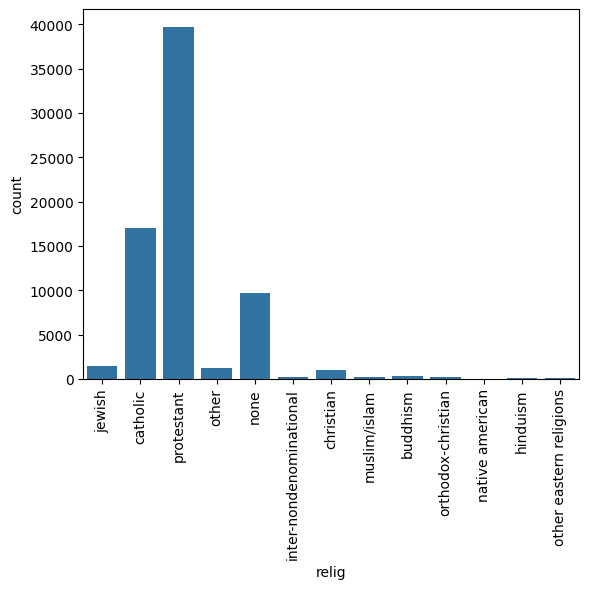

In [66]:
my_plot = sns.countplot(df, x="relig")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

A simple Kernel Density Estimation plot shows that generally more people favor capital punishment with a higher density in the graph. But as people age the difference in opinion on capital punishment lessens.

<Axes: xlabel='age', ylabel='Density'>

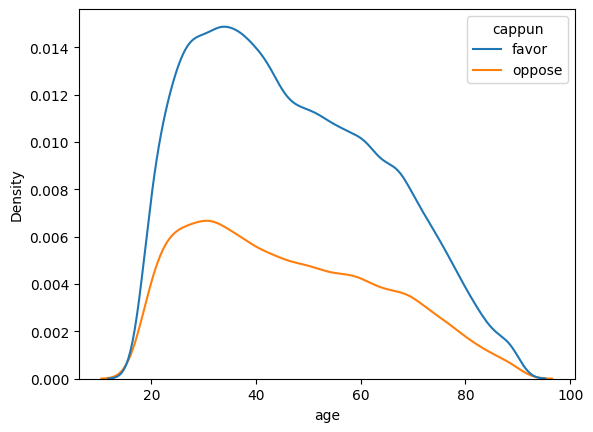

In [67]:
sns.kdeplot(data=df,x='age',hue='cappun')

As for age, 31-40 year olds were interviewed the most, followed by 18-30 year olds. 81-90 year olds were interviewed the least. This distribution makes sense as it follows the general population trend for age. Plotting ages into different bins against their count, it seems 31-40 year olds favor capital punishment the most with the highest frequency being shown in the chart.

<ipython-input-68-6073ae5caef2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '18-30'),
 Text(1, 0, '31-40'),
 Text(2, 0, '41-50'),
 Text(3, 0, '51-60'),
 Text(4, 0, '61-70'),
 Text(5, 0, '71-80'),
 Text(6, 0, '81-90')]

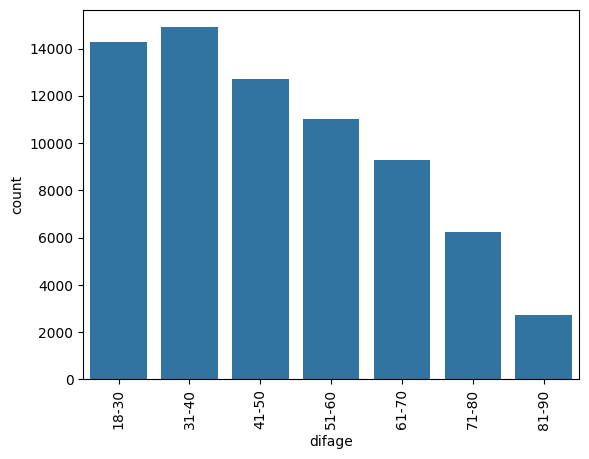

In [68]:
my_plot = sns.countplot(df, x="difage")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

<ipython-input-69-920610fadefb>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '18-30'),
 Text(1, 0, '31-40'),
 Text(2, 0, '41-50'),
 Text(3, 0, '51-60'),
 Text(4, 0, '61-70'),
 Text(5, 0, '71-80'),
 Text(6, 0, '81-90')]

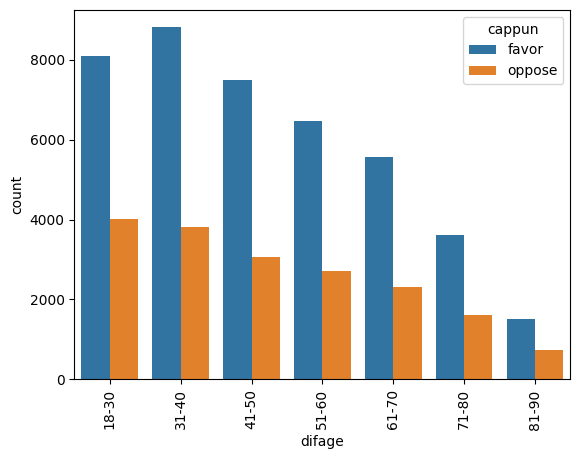

In [69]:
my_plot = sns.countplot(df, x="difage", hue="cappun")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

When looking more specifically into trends for those who oppose capital punishment, we noticed older individuals who are not affiliated with any religious beliefs and possess higher education levels exhibit the highest opposition rates to capital punishment. When looking more into religions, it seems that Christians, irrespective of their educational background, tend to predominantly favor the death penalty.

In [70]:
print(pd.crosstab(df['difage'],df['relig']),'\n')

relig   buddhism  catholic  christian  hinduism  inter-nondenominational  \
difage                                                                     
18-30         49      3614        212        36                       39   
31-40         61      3689        277        52                       46   
41-50         51      3087        216        29                       32   
51-60         41      2547        162        10                       14   
61-70         32      2142         70         9                       16   
71-80         24      1381         27         8                        9   
81-90         10       612          8         5                        1   

relig   jewish  muslim/islam  native american  none  orthodox-christian  \
difage                                                                    
18-30      211            41                9  2858                  20   
31-40      244            70                7  2486                  47   
41-50      223 

In [71]:
print(pd.crosstab(df['educ'],df['relig']),'\n')

relig  buddhism  catholic  christian  hinduism  inter-nondenominational  \
educ                                                                      
0.0           2        55          0         1                        1   
1.0           0        13          0         0                        0   
2.0           0        53          2         0                        0   
3.0           1        72          1         0                        0   
4.0           0        87          0         0                        0   
5.0           1       105          2         2                        0   
6.0           1       297          8         0                        0   
7.0           0       201          3         0                        0   
8.0           6       655         16         0                        2   
9.0           0       490         25         0                        4   
10.0          5       665         31         1                        3   
11.0          9       848

<ipython-input-72-74c2039bbcc8>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, 'jewish'),
 Text(1, 0, 'christian'),
 Text(2, 0, 'Other Religions'),
 Text(3, 0, 'none'),
 Text(4, 0, 'muslim/islam'),
 Text(5, 0, 'buddhism'),
 Text(6, 0, 'native american'),
 Text(7, 0, 'hinduism')]

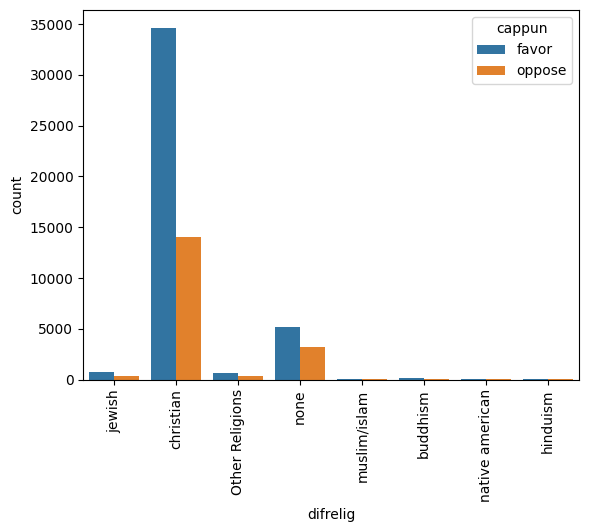

In [72]:
my_plot = sns.countplot(df, x="difrelig", hue="cappun")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

In [73]:
rslt_df = df[df['difrelig'] == 'christian']
other_df = df[df['difrelig'] != 'christian']
jewish = df[df['difrelig'] == 'jewish']
hindu = df[df['relig'] == 'hinduism']

KDE Christians opinion by education

<Axes: xlabel='educ', ylabel='Density'>

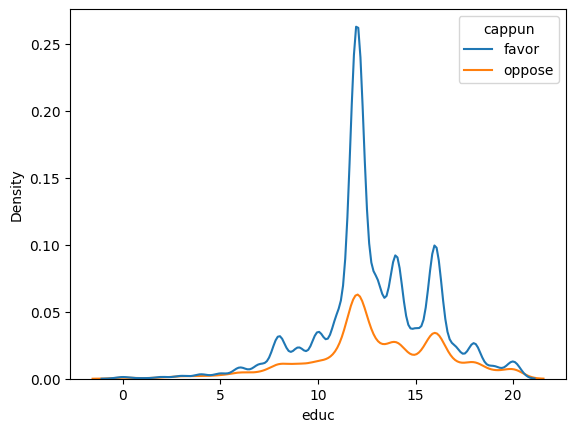

In [74]:
sns.kdeplot(data=rslt_df, x="educ", hue="cappun") # Grouped by ccappun

On the other hand, individuals practicing Hinduism, particularly those in their forties, exhibit a higher tendency to oppose capital punishment compared to those who favor it. Furthermore, we noticed that a positive correlation exists between higher education levels and increased opposition to capital punishment.

<Axes: xlabel='educ', ylabel='Density'>

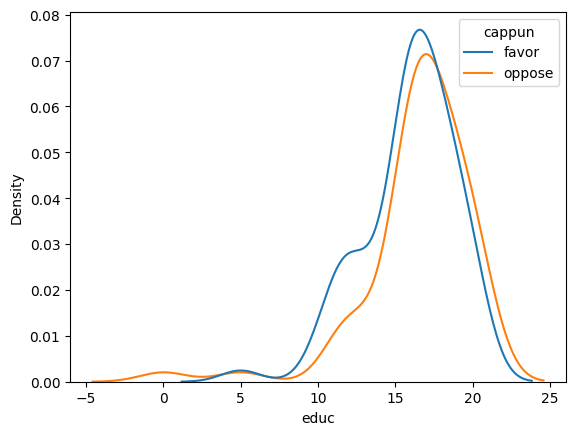

In [75]:
sns.kdeplot(data=hindu, x="educ", hue="cappun") # Grouped by ccappun

<Axes: xlabel='educ', ylabel='Density'>

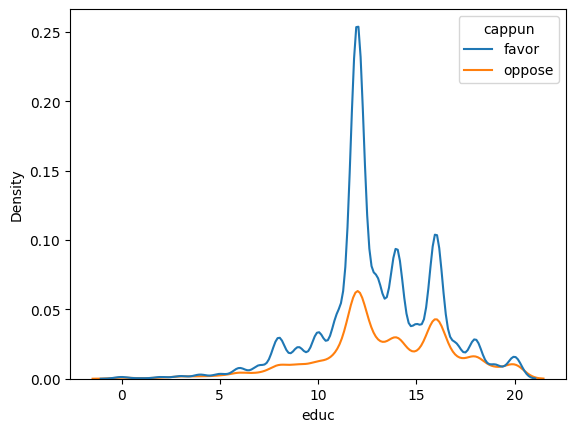

In [76]:
sns.kdeplot(data=df, x="educ", hue="cappun") # Grouped by ccappun

It is important for us to include Kernel Density Estimation plots to help illustrate the distribution of attitudes towards capital punishment within specific subgroups, making it easier to discern patterns and trends with a more accurate representation of the data.  The following KDE plot reveals that individuals with advanced education levels who do not identify as Christian tend to exhibit a stronger inclination towards opposing capital punishment compared to supporting it.
On the flip side, among Christians of various age groups, a consistent and low opposition rate is observed through the following plot, indicating a persistent preference for the death penalty.

KDE Non Christians opinion by education

<Axes: xlabel='educ', ylabel='Density'>

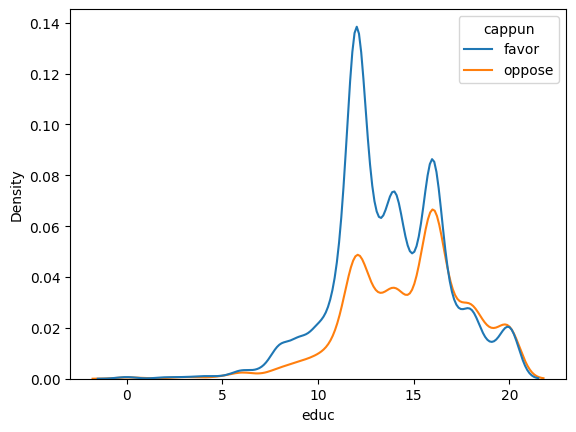

In [77]:
sns.kdeplot(data=other_df, x="educ", hue="cappun") # Grouped by ccappun

KDE Christians opinionby age

<Axes: xlabel='age', ylabel='Density'>

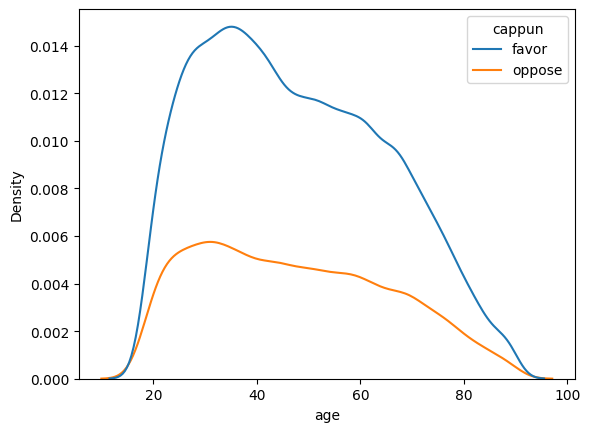

In [78]:
sns.kdeplot(data=rslt_df, x="age", hue="cappun") # Grouped by ccappun

When exploring central tendencies in the age and education variables, we noticed that the average age of both those who favor and oppose capital punishment is around 46 years old. This suggests that a significant portion of the study’s data falls within the middle range of ages, indicating that the perspectives captured are representative of a diverse yet centered age demographic. Similarly, the average education level for both individuals who favor and those who oppose capital punishment is around 13 years, meaning they just graduated high school and are in their first year of a university education. This finding underscores that the study’s data collection is concentrated around a moderate educational attainment level.
 Additionally, the similarity in average education levels for both groups suggests a balanced representation, capturing a substantial portion of individuals with a moderate duration of formal education. The concentration of data in the middle range of age and education has implications for the generalizability of the study’s findings. While the results provide valuable insights into the attitudes of the individuals with average age and education levels, caution should be exercised when extrapolating these findings to extreme age or education brackets. On the other hand, understanding that the study’s data is centered around average age and education levels enhances its relevance to public opinion dynamics. The study captures the sentiments of individuals who represent a considerable segment of the population, making the findings pertinent to discussions on capital punishment that resonate with a broad cross-section of society.

In [79]:
result1 = df.groupby(['cappun','difrelig']).mean()
print(result1)

                              age       educ
cappun difrelig                             
favor  Other Religions  40.140325  13.765140
       buddhism         45.428571  14.613445
       christian        47.553751  12.855713
       hinduism         41.388060  15.910448
       jewish           51.934037  14.940633
       muslim/islam     39.955056  14.235955
       native american  43.562500  12.562500
       none             40.864802  13.439200
oppose Other Religions  39.512064  14.533512
       buddhism         48.647619  15.771429
       christian        47.345096  12.935638
       hinduism         40.737705  16.508197
       jewish           48.936675  15.778364
       muslim/islam     38.200000  13.962500
       native american  41.266667  13.666667
       none             41.094259  14.588271


<ipython-input-79-85f4469ed8de>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result1 = df.groupby(['cappun','difrelig']).mean()


In [80]:
result = df.groupby('cappun').mean()
print(result)

              age       educ
cappun                      
favor   46.649925  12.993716
oppose  46.044173  13.355192


<ipython-input-80-2eab459a11f5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = df.groupby('cappun').mean()


<ipython-input-81-9951dd117eb0>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)


[Text(0, 0, '0.0'),
 Text(1, 0, '1.0'),
 Text(2, 0, '2.0'),
 Text(3, 0, '3.0'),
 Text(4, 0, '4.0'),
 Text(5, 0, '5.0'),
 Text(6, 0, '6.0'),
 Text(7, 0, '7.0'),
 Text(8, 0, '8.0'),
 Text(9, 0, '9.0'),
 Text(10, 0, '10.0'),
 Text(11, 0, '11.0'),
 Text(12, 0, '12.0'),
 Text(13, 0, '13.0'),
 Text(14, 0, '14.0'),
 Text(15, 0, '15.0'),
 Text(16, 0, '16.0'),
 Text(17, 0, '17.0'),
 Text(18, 0, '18.0'),
 Text(19, 0, '19.0'),
 Text(20, 0, '20.0')]

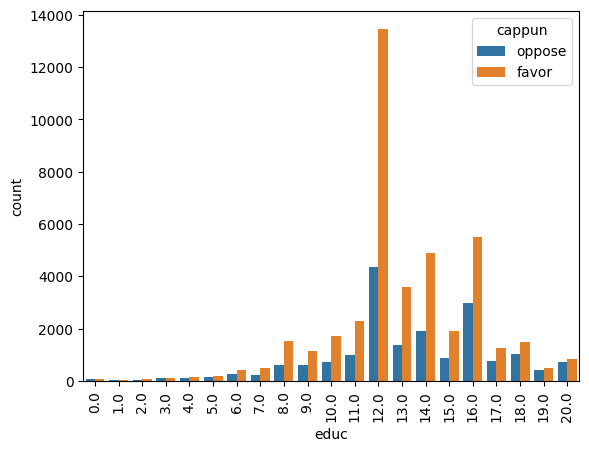

In [81]:
my_plot = sns.countplot(df, x="educ", hue="cappun")
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=90)

The previous findings shed light on the nuanced relationships between religious beliefs, age, education, and attitudes towards capital punishment, providing valuable insights into the complexities of public opinion on this issue.


##Conclusion
Using data from the General Social Survey we analyzed patterns among the following variables: age, education, religion, and opinion on capital punishment. We found that generally, all religious groups have a majority opinion that favors the death penalty. Especially among people who identify as christians, there is a strong favoring opinion. It was only when analyzing specific sub-groups such as highly educated non-christians or middle to older aged hindus that we were able to identify groups where there was a majority opposing capital punishment.
Our data preparation methods cleaned the data while maintaining the integrity of the information, dropped answers tended to make up approximately 1% of all responses. Decisions to group variables and bin information were made in the interest of analyzing the data meaningfully, and not in an effort to misconstrued the information.
There is, however, a benefit to further analysis with more information. The data we used was limited in certain regards; there were few entries from religious groups such as hindus, buddhists, and native americans. A more robust analysis would require a greater number of data points from these groups to produce a more reliable sample.
Further research could be done to explore each religion more in depth, analyzing sub-groups or denominations with each religion. For the purpose of our analysis we generalized Christians but there may be different trends across different Christian sects. Additionally, Islam, HInduism, and Native Americans have different sects that were not even identified in this particular survey. More information with more specific questions would allow for a more in depth understanding of how religion, age, and education affect people’s opinion on capital punishment.


##Appendices

In [82]:
rslt_df = df[df['educ'] == 'christian']
other_df = df[df['difrelig'] != 'christian']

<Axes: xlabel='educ', ylabel='Density'>

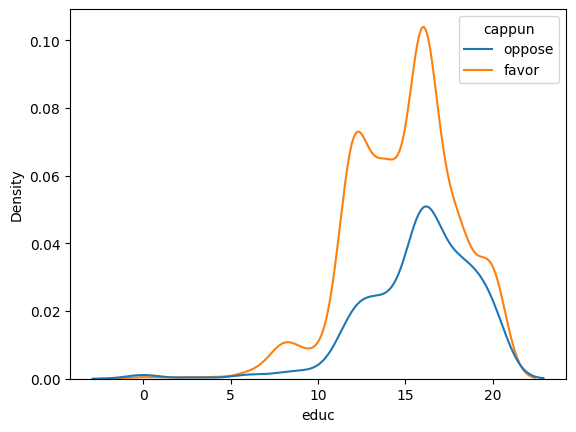

In [83]:
sns.kdeplot(data=jewish, x="educ", hue="cappun") # Grouped by ccappun

<Axes: xlabel='age', ylabel='Density'>

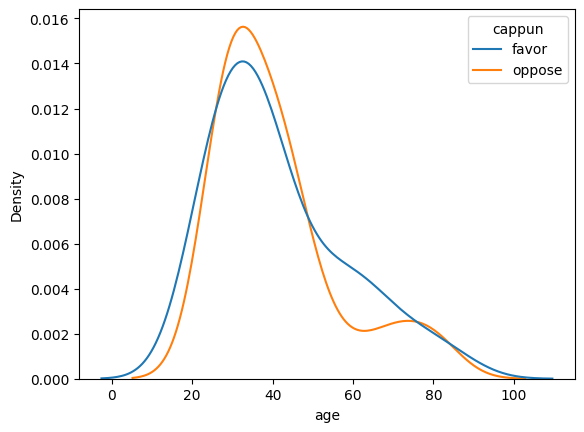

In [84]:
sns.kdeplot(data=hindu, x="age", hue="cappun") # Grouped by ccappun